In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
email_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/3389523a-5e5a-479d-9f6a-27a0a63eb17e/Spam.txt', sep=',', header=None)
email_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
# columns names can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names
email_data.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
email_data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [9]:
email_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [10]:
email_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [11]:
email_data.spam.describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [33]:
# ====> spilitting the independent variables and dependent variable
x = email_data.drop(columns='spam')
y = email_data.spam.values.astype('int')

In [37]:
x.columns
# ===> scale x value
from sklearn.preprocessing import scale
x[x.columns] = scale(x)
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1450,0.279855,-0.017835,0.018536,-0.0469,1.126906,0.343685,0.193644,2.156223,2.799616,0.528299,...,-0.111546,-0.158453,-0.514307,1.682394,0.162987,0.635290,-0.033166,-0.028258,-0.016282,0.971018
1739,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,5.367870,...,-0.111546,0.901335,-0.514307,-0.155198,1.570569,-0.308355,-0.103048,-0.020063,-0.201020,-0.332006
4390,-0.342434,-0.165072,2.855341,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,0.606562,-0.155198,0.785854,-0.308355,-0.103048,-0.095206,-0.221546,-0.341902
3551,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,0.745447,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,-0.223240,-0.308355,-0.103048,-0.077271,0.060693,-0.223146
428,-0.342434,-0.165072,5.454094,-0.0469,0.175148,-0.350266,1.905453,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,0.225541,-0.155198,0.652207,-0.308355,-0.103048,-0.013286,-0.057335,0.114981


In [39]:
y_train.mean()

0.3860248447204969

In [40]:
y_test.mean()

0.41274438812454745

##### Rescalling is very important feature in SVM as some features may vary from 10 - 1000K which causes to dominate higher value features to small features.

## Modeling:

In [43]:
from sklearn.svm import SVC

In [44]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 | 

#### More C value is a penalty parameter, More the value it's try to overfit so try to regularize the model

In [46]:
model = SVC(C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
from sklearn import metrics

In [53]:
cm = metrics.confusion_matrix(y_pred, y_test)
cm

array([[774,  58],
       [ 37, 512]])

In [49]:
metrics.accuracy_score(y_pred, y_test)

0.9312092686459088

In [50]:
metrics.precision_score(y_pred, y_test)

0.8982456140350877

In [51]:
metrics.recall_score(y_pred, y_test)

0.9326047358834244

In [57]:
# ======> Specificity
# ======> Specificity = TN / (FP + TN)
specificity = (cm[0][0] / (cm[0][0] + cm[0][1]))
specificity

0.9302884615384616

### Result: 

* 93% of accuracy of the model is derived
* Recall --> 89% spam emails identified correctly
* Specificity --> 93% ham emails identified correctly

### Hyper parameter tuning: 

#### K-fold cross validation:

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [67]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)
model = SVC(C=1)
cross_validation_result = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=folds)
cross_validation_result

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([0.92391304, 0.92701863, 0.92857143, 0.93322981, 0.93167702])

In [68]:
print(cross_validation_result)
print("mean accuracy = {}".format(cross_validation_result.mean()))

[0.92391304 0.92701863 0.92857143 0.93322981 0.93167702]
mean accuracy = 0.9288819875776397


### Gridsearch to find optimal hyper parameter C:

In [69]:
from sklearn.model_selection import GridSearchCV

In [71]:
svc_model = SVC()
params = {"C": [0.1, 1, 10, 100, 1000]}
gsc_models = GridSearchCV(svc_model, param_grid=params, scoring='accuracy',
                          cv=folds, verbose=1, return_train_score=True)


In [72]:
gsc_models.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [74]:
cv_results = pd.DataFrame(gsc_models.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.331535,0.062997,0.055560,0.001385,0.1,{'C': 0.1},0.900621,0.889752,0.906832,0.895963,...,0.901553,0.008595,5,0.909938,0.907997,0.910326,0.911102,0.905280,0.908929,0.002092
1,0.195738,0.014631,0.035695,0.002214,1,{'C': 1},0.923913,0.927019,0.928571,0.933230,...,0.928882,0.003316,2,0.947205,0.948758,0.948758,0.944099,0.947205,0.947205,0.001701
2,0.161179,0.010160,0.028816,0.002890,10,{'C': 10},0.931677,0.934783,0.930124,0.936335,...,0.931366,0.004326,1,0.968556,0.968168,0.969720,0.971273,0.967780,0.969099,0.001266
3,0.219199,0.025221,0.028497,0.002569,100,{'C': 100},0.928571,0.940994,0.925466,0.923913,...,0.925776,0.009938,3,0.988742,0.984860,0.989519,0.986413,0.988354,0.987578,0.001701
4,0.254185,0.041857,0.027107,0.004948,1000,{'C': 1000},0.928571,0.920807,0.911491,0.899068,...,0.912733,0.010821,4,0.996118,0.993789,0.995730,0.993789,0.994953,0.994876,0.000963


In [76]:
gsc_models.best_params_

{'C': 10}

In [77]:
gsc_models.best_score_

0.9313664596273292

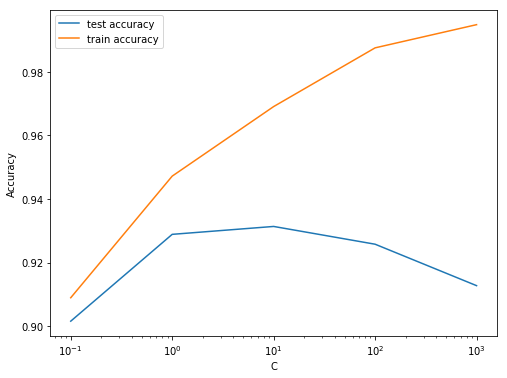

In [98]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

#### Predict the model with best hyper paramter C 10:

In [80]:
accu_model = SVC(C=gsc_models.best_params_['C'])
accu_model.fit(x_train, y_train)
y_predict = accu_model.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [87]:
metrics.accuracy_score(y_test, y_predict)

0.9290369297610427

In [88]:
metrics.precision_score(y_test, y_predict)

0.9306569343065694

In [94]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_predict)
cm

array([[773,  38],
       [ 60, 510]])

In [95]:
metrics.recall_score(y_test, y_predict)

0.8947368421052632

In [96]:
# ===> Specificity: TN/(FP+TN)
specificity = (cm[0][0] / (cm[0][0] + cm[0][1]))
specificity 

0.9531442663378545

#### Note: It's not always that accuracy that determines the best suited hyper parameter, it depends on the business use case.

### Optimizing for other model metrics:

In [99]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 

In [102]:
scores = ['accuracy', 'precision', 'recall']
for score in scores:
    gsc_model = GridSearchCV(SVC(), param_grid=params, scoring=score, cv=folds, verbose=1, return_train_score=True)
    gsc_model.fit(x_train, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, gsc_model.best_score_, gsc_model.best_params_))
    print("\n")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3

 The highest accuracy score is 0.9313664596273292 at C = {'C': 10}


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3

 The highest precision score is 0.9402828655127247 at C = {'C': 0.1}


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3

 The highest recall score is 0.8939222481153271 at C = {'C': 10}




In [123]:
from matplotlib import colors;

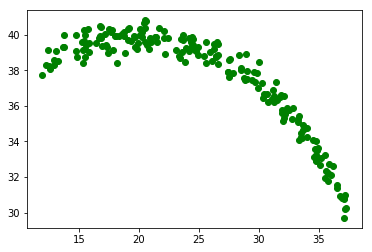

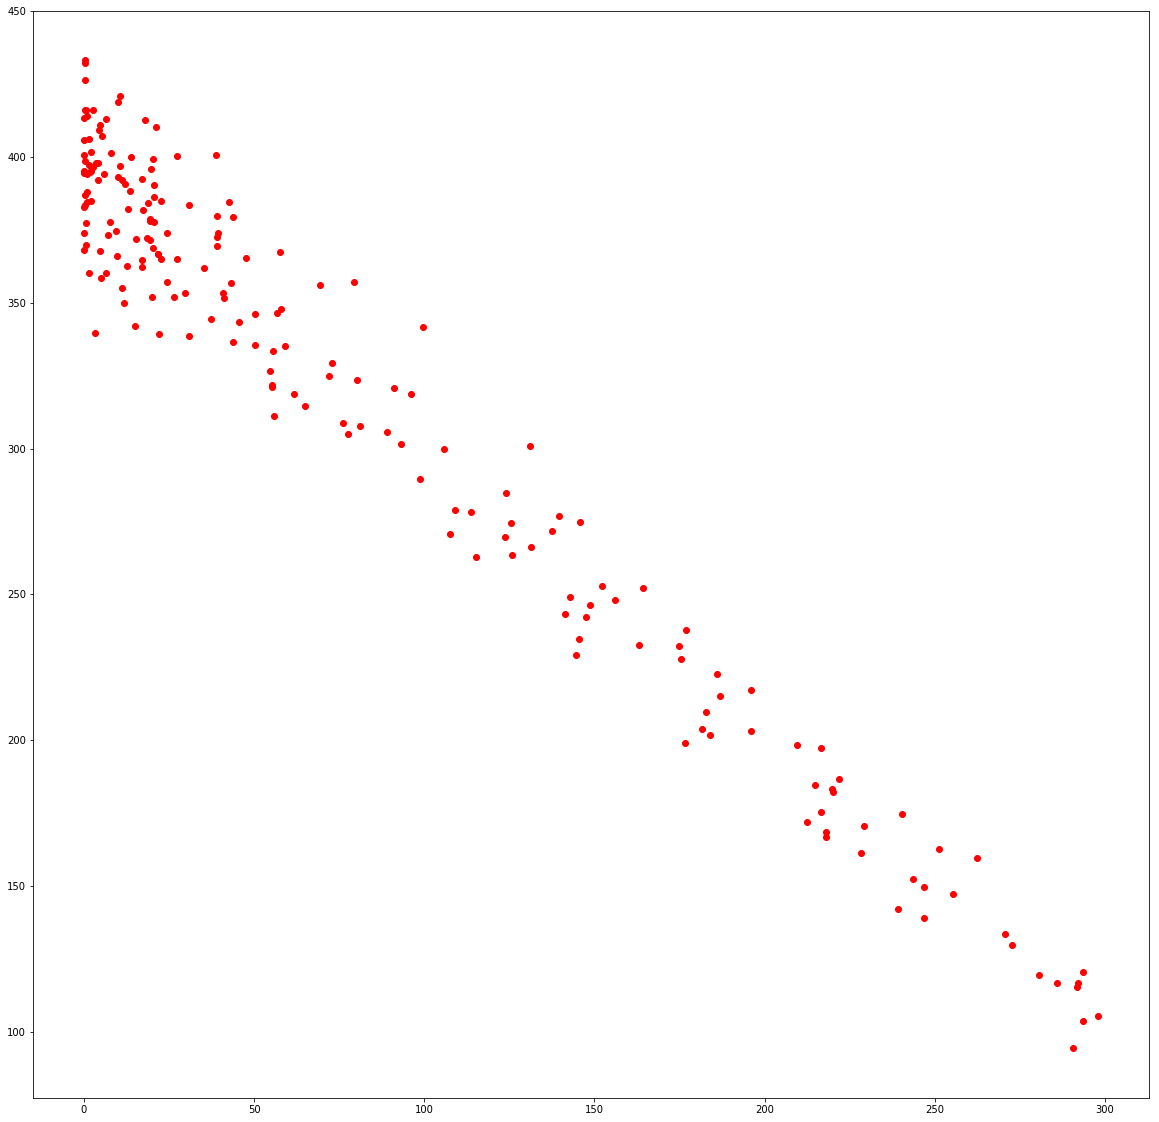

In [134]:
## ====> Determine the shape of the nonlinear graph to linean
M = 20
x=np.random.uniform(low=10, high=35, size=(200,)) + np.random.normal(loc=2, scale=0.5, size=200)
y = np.sqrt(400 - (x-20)**2)+ np.random.normal(loc=20, scale=0.5, size=200)
plt.scatter(x,y, color='green')
plt.figure(figsize=(20,20))
p = (x-M)**2
q = (y-M)**2
plt.scatter(p,q,color='red')

## Non linear SVM using kernal RBF:

In [137]:
rbf_model = SVC(C=1, kernel='rbf')
rbf_model.fit(x_train, y_train)
y_pred = rbf_model.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Model evaluation metrics: 

In [138]:
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

0.9312092686459088

In [139]:
metrics.recall_score(y_true=y_test, y_pred=y_pred)

0.8982456140350877

In [140]:
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[774,  37],
       [ 58, 512]])

In [142]:
metrics.precision_score(y_true=y_test, y_pred=y_pred)

0.9326047358834244

### Hypder parameter tuning:

There 3 parameters to optimize the performance:

1. Kernel (Linear, Polynomial, RBF-Radial base functions)
2. C (Soft marginal constant)
3. Gamma (Controls the amount of non-linearity in the function)



### Grid search for hyper parameter tuning: 

In [144]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 

In [152]:
params = [{'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
model = SVC(kernel='rbf')
folds = KFold(n_splits=5, shuffle=True, random_state=6)
search_cv = GridSearchCV(model, scoring= 'accuracy', verbose=1,
                         param_grid=params, cv=folds, return_train_score=True)

search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   23.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=6, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [153]:
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.201579,0.039461,0.035791,0.004472,1,0.01,"{'C': 1, 'gamma': 0.01}",0.933230,0.928571,0.923913,...,0.928571,0.004167,5,0.939441,0.937112,0.939053,0.939441,0.940994,0.939208,0.001242
1,0.251702,0.025194,0.050529,0.002070,1,0.001,"{'C': 1, 'gamma': 0.001}",0.906832,0.891304,0.911491,...,0.902484,0.007569,10,0.903339,0.908773,0.902950,0.903727,0.908385,0.905435,0.002582
2,0.397403,0.026092,0.079342,0.001446,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.777950,0.782609,0.804348,...,0.790373,0.009317,12,0.791149,0.799689,0.789208,0.794643,0.786491,0.792236,0.004576
3,0.144720,0.004354,0.026067,0.001807,10,0.01,"{'C': 10, 'gamma': 0.01}",0.950311,0.937888,0.920807,...,0.935714,0.009450,1,0.959239,0.959627,0.961568,0.960404,0.961568,0.960481,0.000963
4,0.160684,0.002951,0.030387,0.000844,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933230,0.922360,0.925466,...,0.926398,0.006102,7,0.932453,0.931677,0.937500,0.933230,0.937500,0.934472,0.002521
5,0.241622,0.011986,0.048245,0.003323,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.902174,0.889752,0.909938,...,0.899379,0.006903,11,0.900621,0.907220,0.901398,0.900233,0.902950,0.902484,0.002544
6,0.175211,0.006092,0.022507,0.000813,100,0.01,"{'C': 100, 'gamma': 0.01}",0.937888,0.923913,0.931677,...,0.927950,0.006102,6,0.979037,0.979425,0.980590,0.978649,0.980202,0.979581,0.000720
7,0.147599,0.002682,0.023051,0.000682,100,0.001,"{'C': 100, 'gamma': 0.001}",0.942547,0.934783,0.925466,...,0.935093,0.005843,2,0.946040,0.949534,0.950311,0.947205,0.950311,0.948680,0.001743
8,0.176141,0.006388,0.032200,0.002074,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.930124,0.919255,0.922360,...,0.921739,0.009450,8,0.927019,0.925854,0.928960,0.927019,0.931289,0.928028,0.001911
9,0.264517,0.008923,0.020798,0.000841,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.914596,0.917702,0.911491,...,0.917081,0.006916,9,0.992624,0.993012,0.992236,0.992624,0.994177,0.992935,0.000668


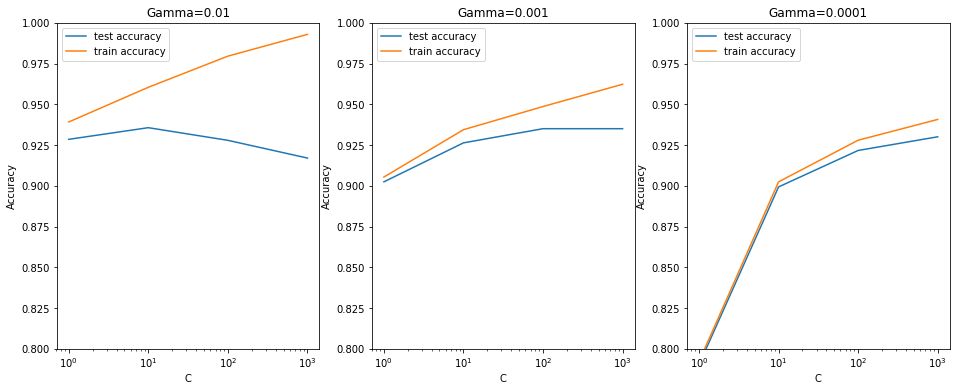

In [154]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [155]:
best_score = search_cv.best_score_
best_hyperparams = search_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9357142857142857 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


##### This shows that non-linear model is also giving the same result and non-linearity may be not required here. 